# Modeling Wine Quality 

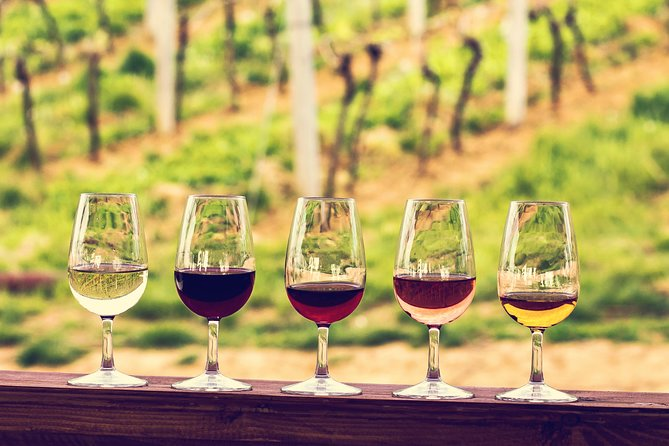

## Overview
In this project, we will use linear regression to predict the quality of wine based on its chemical characteristics. 

## Business Problem
The Washington Winegrower's Association is would like to increase their performance in competitions. To help their wineries select which wines to send to competition, they asked us to develop a model that can predict how well a wine can be expected to perform based on it's chemical properties. 

## Data Understanding 
To accomplish this, we used at a dataset collected by UCI and sourced from [Kaggle](https://www.kaggle.com/huseyinelci/wne-qualty-by-uci), that contains information on the chemical breakdown and rated quality of red and white wines. In our model, we will use wine quality as our dependent variable. Information regarding the physiochemical properties of the wine will make up our independent variables. These include: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates and alcohol.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from functions import model as m
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
white = pd.read_csv('wines/WineQuality-WhiteWine.csv')
white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
red = pd.read_csv('wines/WineQuality-RedWine.csv')
red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Preparation

This source seperated the analysis of red and white wines into two datasets. Since we want to create a single model that takes into account differences associated with red and white wines, we combined the datasets and created two new columns - red and white. 

In [4]:
white['white'] = 1
white['red'] = 0
red['white'] = 0
red['red'] = 1

In [5]:
df = pd.concat([white, red], ignore_index = True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,white,red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0


Next, we created multiple different visualizations to better understand the relationship between our independent and dependent variables. 

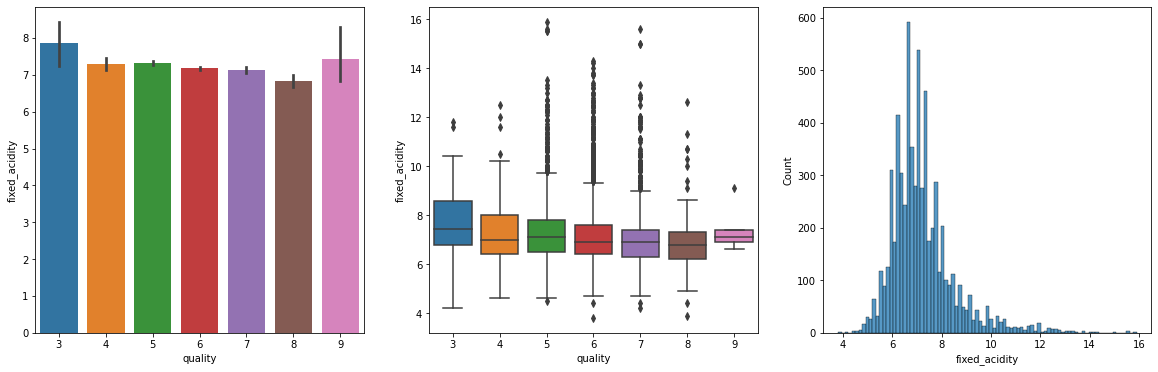

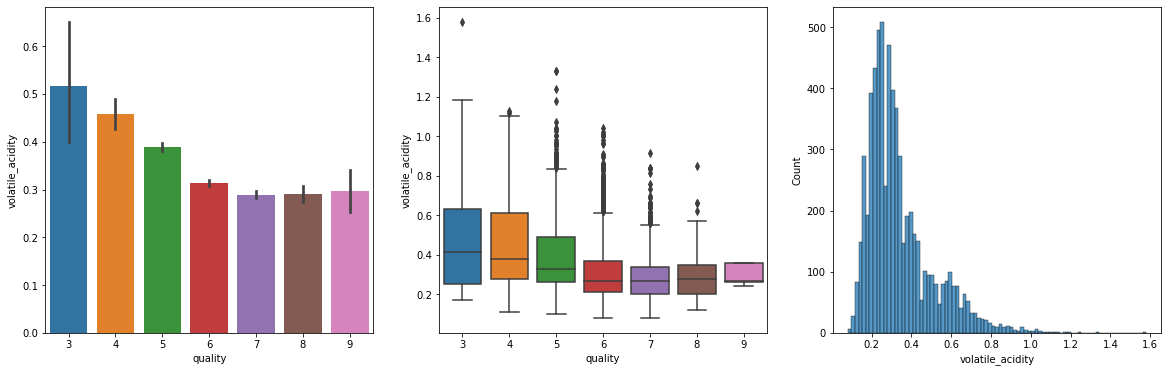

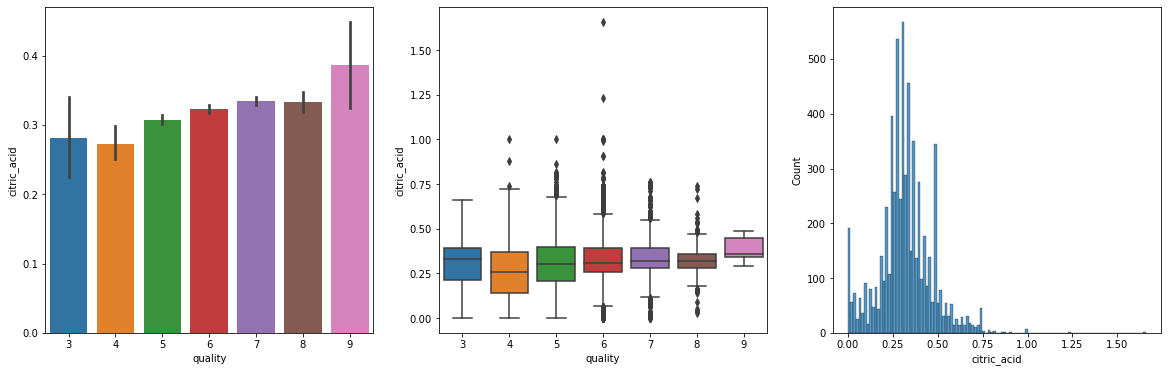

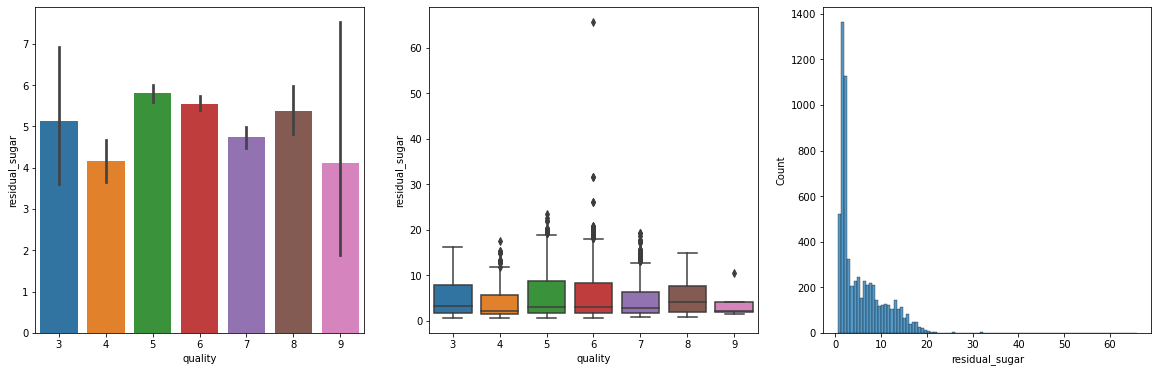

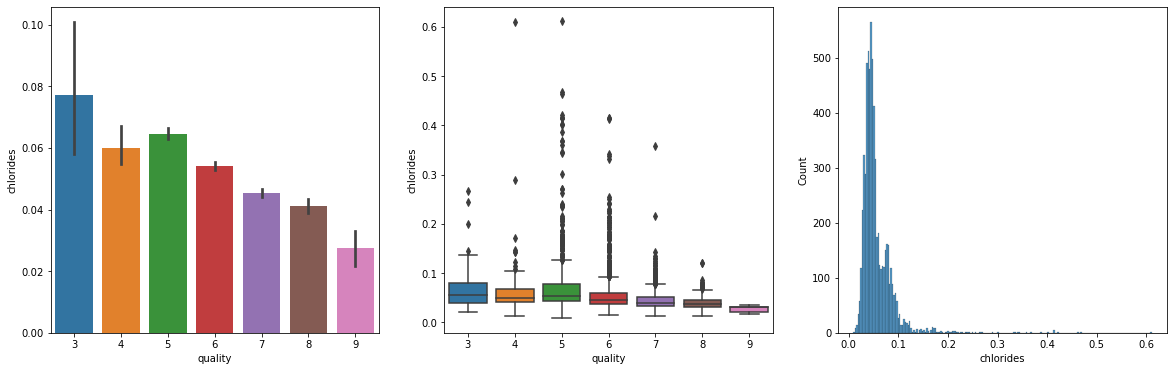

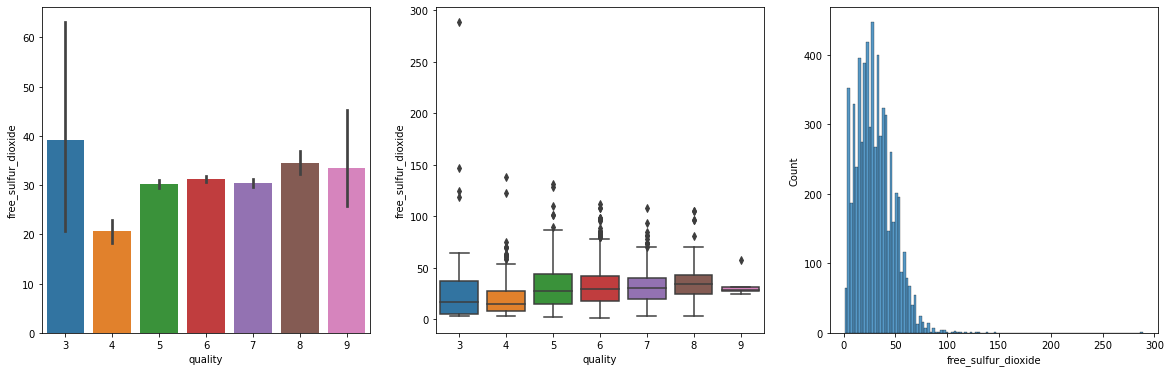

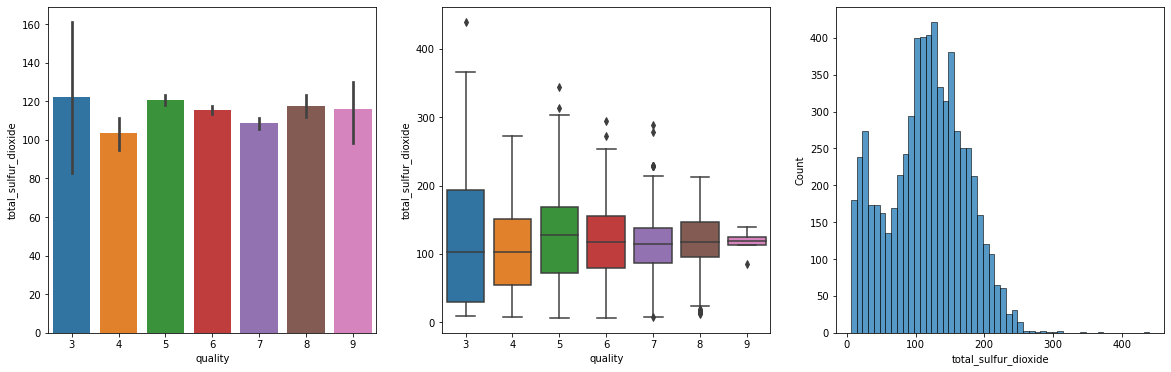

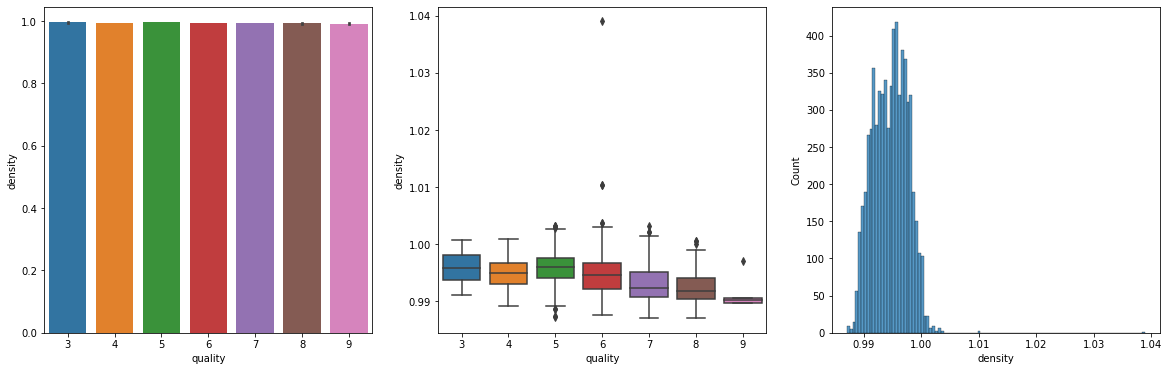

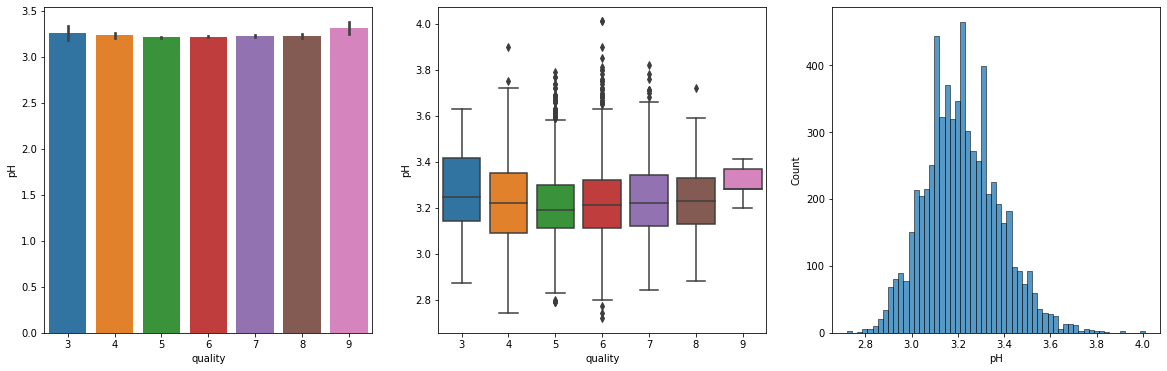

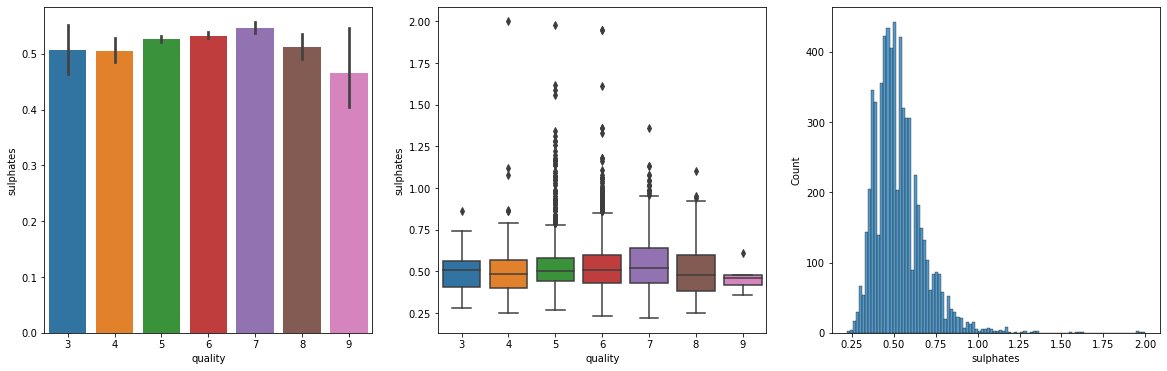

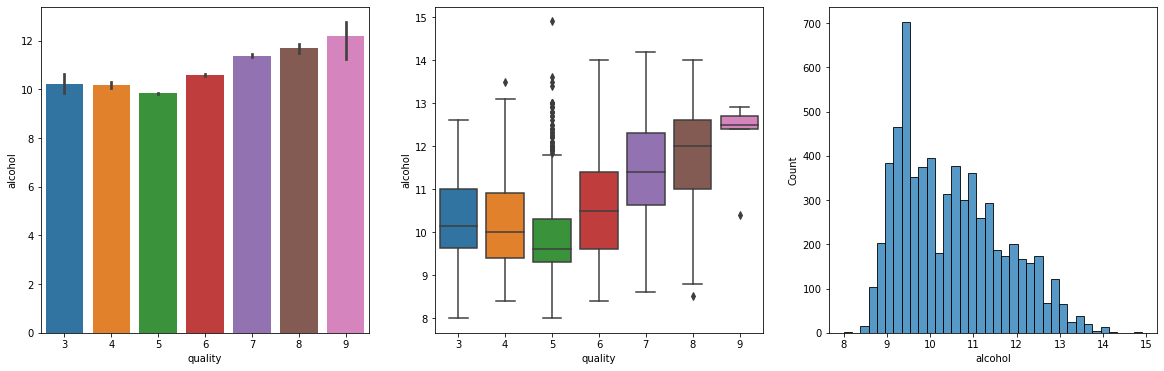

In [6]:
for column in df.iloc[:, :-3]:
    fig, ax = plt.subplots(1,3, figsize=(20, 6))
    sns.barplot(data=df, x='quality', y=column, ax=ax[0])
    sns.boxplot(data=df, x='quality', y=column, ax=ax[1])
    sns.histplot(data=df, x=column, ax=ax[2])
    plt.show()

This analysis shows that several features are linear (volatile acid, citric acid, chlorides, and alcohol), though others have more parabolic (or in the case of residual sugars, random) relationships. Additionally, the distribution of several features will need to be normalized.

### Train/Test Split
We will now seperate our data into training and testing subsets to prevent data leakage and accurately validate our model when it is complete.

In [7]:
y = df[['quality']]
x = df.drop(['quality'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

## Data Modeling 
### Baseline Model

In [8]:
m(x_train, x_test, y_train, y_test)

Train Root Mean Square Error: 0.7318209167503708
Test Root Mean Square Error: 0.735486684946056


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     176.7
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:35:34   Log-Likelihood:                -5751.6
No. Observations:                5197   AIC:                         1.153e+04
Df Residuals:                    5184   BIC:                         1.161e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               67.2767     10.309      6.526      0.000      47.066      87.488
fixed_acidity            0.0806      0.017      4.634      0.000       0.047       0.115
volatile_acidity        -1.4949      0.090    -16.554      0.000      -1.672      -1.318
citric_acid             -0.0318      0.088     -0.360      0.719      -0.205       0.141
residual_sugar           0.0613      0.007      9.366      0.000       0.048       0.074
chlorides               -0.7078      0.378     -1.873      0.061      -1.448       0.033
free_sulfur_dioxide      0.0042      0.001      4.905      0.000       0.003       0.006
total_sulfur_dioxide    -0.0014      0.000     -3.859      0.000      -0.002      -0.001
density               -100.0085     15.703     -6.369      0.000    -130.794     -69.223
pH                       0.4587      0.100      4.569      0.000       0.262       0.655
sulphates                0.7108      0.085      8.333      0.000       0.544       0.878
alcohol                  0.2188      0.020     10.988      0.000       0.180       0.258
white                   33.4601      5.138      6.512      0.000      23.387      43.533
red                     33.8165      5.171      6.539      0.000      23.678      43.955
==============================================================================
Omnibus:                      121.668   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.287
Skew:                          -0.030   Prob(JB):                     3.72e-61
Kurtosis:                       4.132   Cond. No.                     3.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.92e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Analysis:** An R-squared means that 29% of the variation in our dependent variable (quality) are explained by the independent variables. With an R2 of .29, this model has plenty of room for improvement! Looking at the test and train RMSE values, they are very similiar and small, indicating that our model is doing a good job of predicting an accurate response in both the train and test datasets. Based on our alpha level to 0.05, p-values for citric acid, chlorides are insignificant. In the first iteration, we will check for multicollinearity between the features before transforming any variables.

### Iteration 1

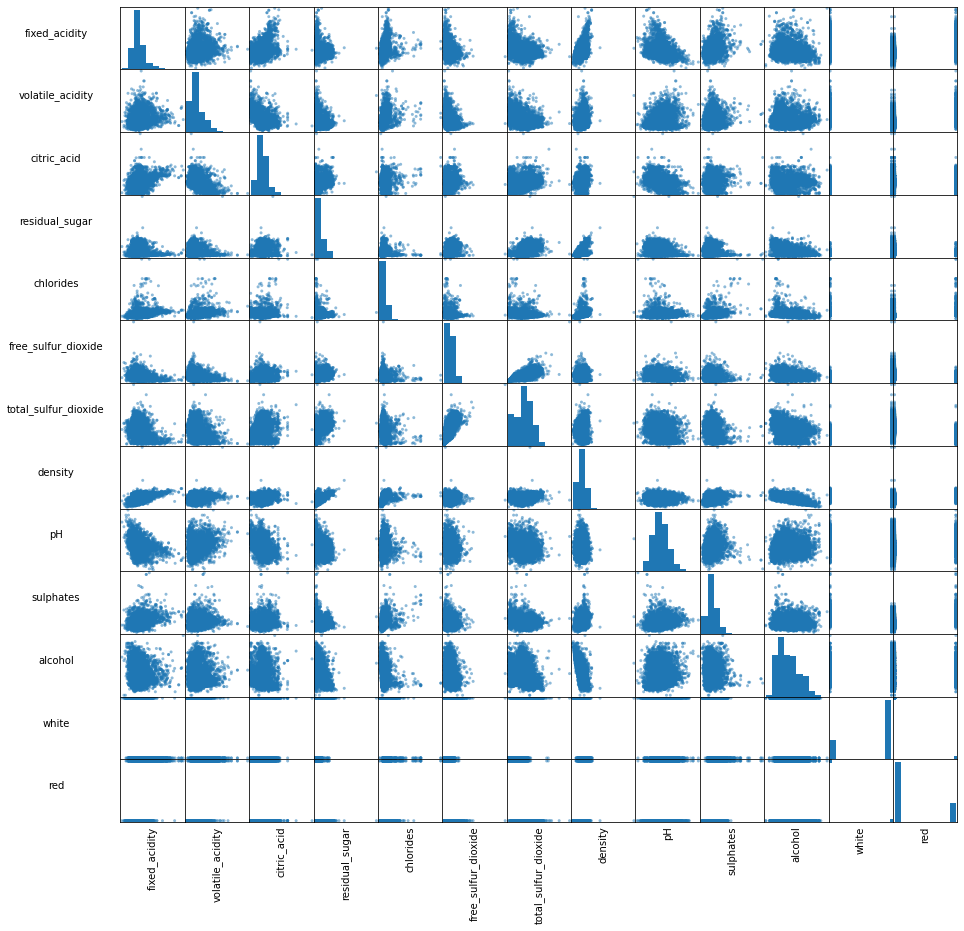

In [9]:
matrix = pd.plotting.scatter_matrix(x_train, figsize  = [15, 15]);

[s.xaxis.label.set_rotation(90) for s in matrix.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in matrix.reshape(-1)]


[s.get_yaxis().set_label_coords(-1,0.5) for s in matrix.reshape(-1)]

[s.set_xticks(()) for s in matrix.reshape(-1)]
[s.set_yticks(()) for s in matrix.reshape(-1)]

plt.show()

In [10]:
df_ = x_train.corr().abs().stack().reset_index().sort_values(0,ascending=False)
df_['pairs'] = list(zip(df_.level_0, df_.level_1))
df_.set_index(['pairs'], inplace=True)
df_.drop(columns=['level_1','level_0'],inplace=True)
df_.columns = ['cc']
df_.drop_duplicates(inplace=True)
df_[(df_.cc>.75) & (df_.cc<1)]

,cc
pairs,


No significant correlations exits between the features. We can move on to try to improve p-values of chlorides from our baseline model.

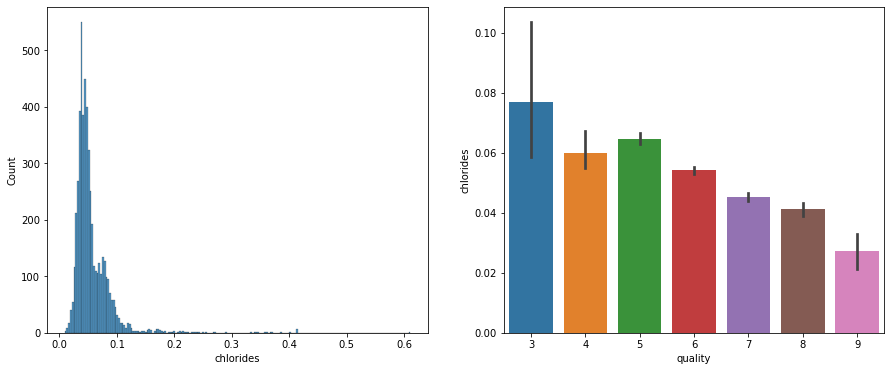

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))
sns.histplot(data=x_train, x='chlorides', ax=ax[0])
sns.barplot(data=df, x='quality', y='chlorides', ax=ax[1]);

Chlorides seem to have a fairly linear relationship with quality, but the distribution is slightly skewed, so we will use a log transformation to help normalize the distributions.

In [12]:
x_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,white,red
4652,6.1,0.38,0.47,1.40,0.051,59.0,210.0,0.99309,3.24,0.50,9.6,1,0
1664,8.1,0.28,0.46,15.40,0.059,32.0,177.0,1.00040,3.27,0.58,9.0,1,0
820,6.6,0.36,0.29,1.60,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,1,0
4397,7.4,0.27,0.26,11.80,0.053,55.0,173.0,0.99699,3.11,0.60,9.8,1,0
2301,6.6,0.22,0.28,12.05,0.058,25.0,125.0,0.99856,3.45,0.45,9.4,1,0


In [13]:
x_train['chlorides'] = np.log(x_train['chlorides'])
x_test['chlorides'] = np.log(x_test['chlorides'])

In [14]:
m(x_train, x_test, y_train, y_test)

Train Root Mean Square Error: 0.7317442898597827
Test Root Mean Square Error: 0.7354829682710506


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     176.9
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:35:50   Log-Likelihood:                -5751.1
No. Observations:                5197   AIC:                         1.153e+04
Df Residuals:                    5184   BIC:                         1.161e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               64.5416     10.477      6.160      0.000      44.002      85.081
fixed_acidity            0.0790      0.017      4.527      0.000       0.045       0.113
volatile_acidity        -1.5022      0.090    -16.746      0.000      -1.678      -1.326
citric_acid             -0.0404      0.088     -0.461      0.645      -0.212       0.131
residual_sugar           0.0599      0.007      9.031      0.000       0.047       0.073
chlorides               -0.0779      0.036     -2.144      0.032      -0.149      -0.007
free_sulfur_dioxide      0.0042      0.001      4.874      0.000       0.002       0.006
total_sulfur_dioxide    -0.0014      0.000     -3.729      0.000      -0.002      -0.001
density                -96.1158     15.940     -6.030      0.000    -127.365     -64.867
pH                       0.4550      0.100      4.535      0.000       0.258       0.652
sulphates                0.6967      0.084      8.272      0.000       0.532       0.862
alcohol                  0.2188      0.020     10.997      0.000       0.180       0.258
white                   32.0851      5.223      6.143      0.000      21.845      42.325
red                     32.4565      5.254      6.178      0.000      22.157      42.756
==============================================================================
Omnibus:                      122.717   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.468
Skew:                          -0.033   Prob(JB):                     7.59e-62
Kurtosis:                       4.138   Cond. No.                     3.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.92e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Analysis:** R2 stayed the same at .290 by doing a log transformation on chlorides. RMSE values show our model is not overfit to our train dataset and is doing well at predicting quality scores. p-value of chlorides became significant after transformation.

### Iteration 2

For this iteration, we will take a look at citric acid, because it still has an insignificant p-value. Our hope is that transforming this variable will improve the model and maybe raise R2 value.

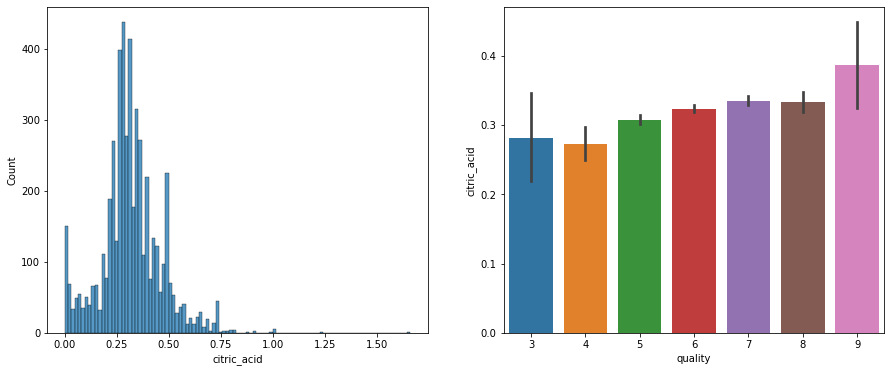

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))
sns.histplot(data=x_train, x='citric_acid', ax=ax[0])
sns.barplot(data=df, x='quality', y='citric_acid', ax=ax[1]);

Citric acid has a more normal distribution along with a linear relationship to quality. We will again try a log transformation, but since most of citric acid values are 0 we will add 1 to each data point to prevent getting a divide by zero error/infinite values after the log transformation.

In [16]:
x_train['citric_acid'] = x_train['citric_acid'].map(lambda x: x+1)
x_test['citric_acid'] = x_test['citric_acid'].map(lambda x: x+1)

In [17]:
x_train['citric_acid'] = np.log(x_train['citric_acid'])
x_test['citric_acid'] = np.log(x_test['citric_acid'])

In [18]:
m(x_train, x_test, y_train, y_test)

Train Root Mean Square Error: 0.7317586436887166
Test Root Mean Square Error: 0.7355851299272989


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     176.8
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:35:52   Log-Likelihood:                -5751.2
No. Observations:                5197   AIC:                         1.153e+04
Df Residuals:                    5184   BIC:                         1.161e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               64.7505     10.475      6.181      0.000      44.214      85.287
fixed_acidity            0.0777      0.017      4.441      0.000       0.043       0.112
volatile_acidity        -1.4920      0.091    -16.425      0.000      -1.670      -1.314
citric_acid             -0.0116      0.119     -0.097      0.923      -0.245       0.222
residual_sugar           0.0600      0.007      9.041      0.000       0.047       0.073
chlorides               -0.0792      0.036     -2.180      0.029      -0.150      -0.008
free_sulfur_dioxide      0.0042      0.001      4.874      0.000       0.002       0.006
total_sulfur_dioxide    -0.0014      0.000     -3.757      0.000      -0.002      -0.001
density                -96.4370     15.938     -6.051      0.000    -127.681     -65.193
pH                       0.4582      0.100      4.566      0.000       0.261       0.655
sulphates                0.6944      0.084      8.244      0.000       0.529       0.860
alcohol                  0.2180      0.020     10.952      0.000       0.179       0.257
white                   32.1885      5.223      6.163      0.000      21.950      42.427
red                     32.5620      5.253      6.199      0.000      22.264      42.860
==============================================================================
Omnibus:                      122.680   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.411
Skew:                          -0.033   Prob(JB):                     7.81e-62
Kurtosis:                       4.138   Cond. No.                     3.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.92e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Analysis:** R2 stayed the same with the transformation of citric acid. p-values for citric acid increased and is still insignificant. We will consider dropping this feature in the next iteration.

### Iteration 3

In [19]:
x_train.drop(['citric_acid'], axis=1, inplace=True)
x_test.drop(['citric_acid'], axis=1, inplace=True)

In [20]:
m(x_train, x_test, y_train, y_test)

Train Root Mean Square Error: 0.7317593061355405
Test Root Mean Square Error: 0.735610074233083


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     193.0
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:35:52   Log-Likelihood:                -5751.2
No. Observations:                5197   AIC:                         1.153e+04
Df Residuals:                    5185   BIC:                         1.161e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               64.8018     10.461      6.195      0.000      44.294      85.310
fixed_acidity            0.0773      0.017      4.531      0.000       0.044       0.111
volatile_acidity        -1.4888      0.085    -17.539      0.000      -1.655      -1.322
residual_sugar           0.0600      0.007      9.047      0.000       0.047       0.073
chlorides               -0.0795      0.036     -2.199      0.028      -0.150      -0.009
free_sulfur_dioxide      0.0042      0.001      4.876      0.000       0.002       0.006
total_sulfur_dioxide    -0.0014      0.000     -3.788      0.000      -0.002      -0.001
density                -96.5164     15.915     -6.065      0.000    -127.716     -65.317
pH                       0.4590      0.100      4.593      0.000       0.263       0.655
sulphates                0.6938      0.084      8.261      0.000       0.529       0.858
alcohol                  0.2178      0.020     11.020      0.000       0.179       0.257
white                   32.2139      5.215      6.177      0.000      21.989      42.438
red                     32.5879      5.246      6.212      0.000      22.304      42.872
==============================================================================
Omnibus:                      122.677   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.420
Skew:                          -0.033   Prob(JB):                     7.77e-62
Kurtosis:                       4.138   Cond. No.                     3.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.92e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Analysis:**  No change to R2 with removal of citric acid and all p-values in model became significant. We will keep citric acid out of the model. Our next goal is to try to improve the R2 value.

### Iteration 4
For our next iteration, we will look at the histograms for each variable and perform additional log transformations to make the distributions more normal.

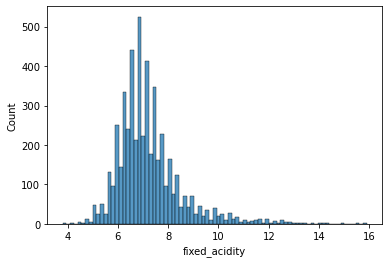

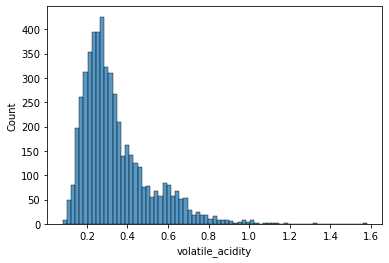

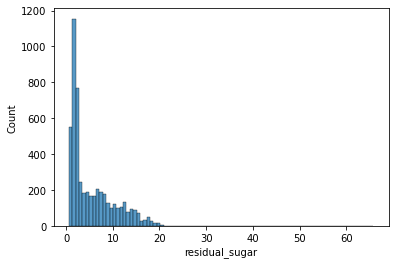

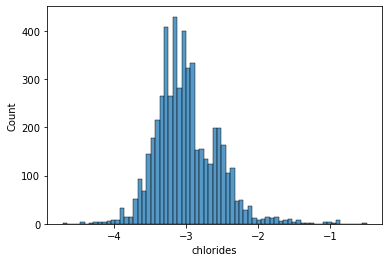

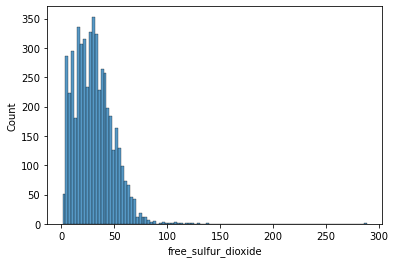

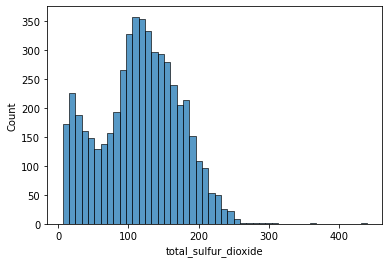

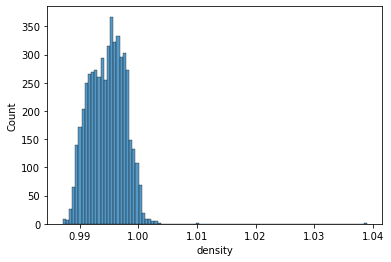

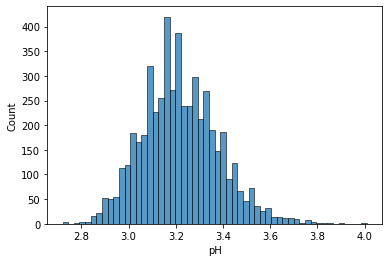

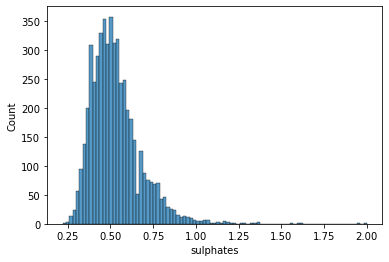

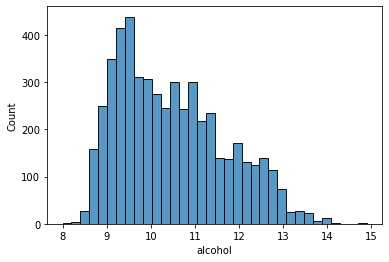

In [21]:
for column in x_train.iloc[:, :-2]:
    sns.histplot(data=x_train, x=column)
    plt.show()

Based on the above histograms, we decided to transform fixed acidity, volatile acidity, residual sugar, free sulfur dioxide and sulphates since their distributions are skewed. 

In [22]:
log_variables = ['fixed_acidity','volatile_acidity','residual_sugar',
                 'free_sulfur_dioxide','total_sulfur_dioxide','sulphates','density','alcohol']
for i in log_variables:
    x_train[i] = np.log(x_train[i])

In [23]:
for i in log_variables:
    x_test[i] = np.log(x_test[i])

In [24]:
m(x_train, x_test, y_train, y_test)

Train Root Mean Square Error: 0.7268784001752576
Test Root Mean Square Error: 0.7301122675402899


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     201.9
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:35:57   Log-Likelihood:                -5716.4
No. Observations:                5197   AIC:                         1.146e+04
Df Residuals:                    5185   BIC:                         1.154e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.9226      0.314     -6.127      0.000      -2.538      -1.307
fixed_acidity            0.2928      0.109      2.692      0.007       0.080       0.506
volatile_acidity        -0.5517      0.031    -17.974      0.000      -0.612      -0.491
residual_sugar           0.2213      0.024      9.112      0.000       0.174       0.269
chlorides               -0.1090      0.035     -3.084      0.002      -0.178      -0.040
free_sulfur_dioxide      0.2362      0.024      9.701      0.000       0.188       0.284
total_sulfur_dioxide    -0.2008      0.032     -6.244      0.000      -0.264      -0.138
density                -50.2381     10.853     -4.629      0.000     -71.514     -28.962
pH                       0.1408      0.089      1.587      0.113      -0.033       0.315
sulphates                0.3866      0.048      8.121      0.000       0.293       0.480
alcohol                  2.8230      0.179     15.811      0.000       2.473       3.173
white                   -1.0901      0.160     -6.818      0.000      -1.404      -0.777
red                     -0.8324      0.160     -5.217      0.000      -1.145      -0.520
==============================================================================
Omnibus:                      113.013   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.560
Skew:                           0.029   Prob(JB):                     6.44e-55
Kurtosis:                       4.072   Cond. No.                     1.86e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.92e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Analysis:** With the last model, all p-values except pH are significant and we were able to raise the R2 value from .290 to .300. We now want to check that all the assumptions for this model are met and either try to transform or drop pH in the next iteration.  

### Assumptions Check

**Check for normality of residuals:**

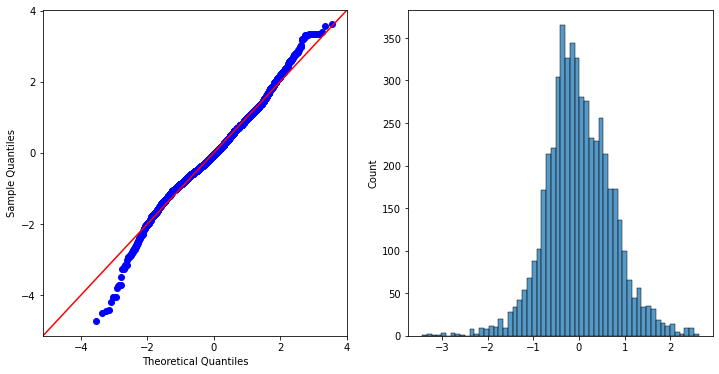

In [25]:
assumption1 = y_train.join(x_train)
f = 'quality ~ '+ ' + '.join(x_train.columns)
model = ols(formula=f, data=assumption1).fit()
residuals = model.resid

fig, ax = plt.subplots(1,2, figsize=(12, 6))
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=ax[0])
sns.histplot(model.resid, ax=ax[1])
plt.show()

The Q-Q plot and histogram of residuals, show a relatively normal distribution with the expection of a heavier left tail. Regardless of this, we decided to continue with this model since both plots very closely resemble a normal distribution. 

**Check for homoscedasticity:**

In [26]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(x_train, y_train))
print("Test R2: ", linreg.score(x_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.2998973020538943
Test R2:  0.32822985089331236
Train RMSE:  0.7268784001752576
Test RMSE:  0.7301122675402899


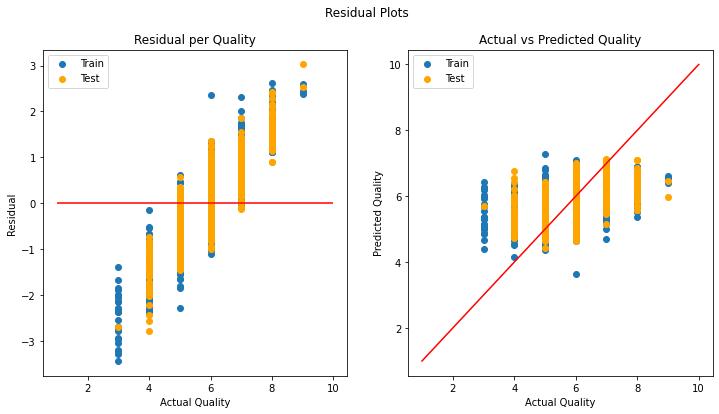

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Residual Plots')

axes[0].scatter(y_train, y_train-y_hat_train, label='Train')
axes[0].scatter(y_test, y_test-y_hat_test, color='orange', label='Test')
axes[0].set(xlabel='Actual Quality', ylabel='Residual', title='Residual per Quality')
axes[0].hlines(0, xmin=1, xmax=10, colors='red')
axes[0].legend()

axes[1].scatter(y_train, y_hat_train, label='Train')
axes[1].scatter(y_test, y_hat_test, color='orange', label='Test')
axes[1].plot([1, 10], [1, 10], color='red', linestyle='-')
axes[1].set(xlabel='Actual Quality', ylabel='Predicted Quality', title='Actual vs Predicted Quality')
axes[1].legend()
fig.show()

**Analysis:** Looking at the residual per quality plot, we see that our model overpredicts for quality values of 3 and underpredicts for qualities between 8-10. We could consider limiting our train and test data to only contain quality values between 5-7 to try and increase our accuracy and reduce our error. For this project, we dont want to limit our data too much because we want it to be able to predict a larger range of quality values, and especially high quality scores, but can be something to consider for later work. To note: Because quality only contained values of 1-10, this variable and plot resemble that of a categorical variable. To improve this we can gather more data with a wider range of quality scores.

### Iteration 5

In this iteration we will drop pH from our model because its p-value is greater than our alpha of 0.05. This means that this variable is not helping to accurately and consistantly predict wine quality and therefore is not significant to our model.

In [28]:
x_train.drop(['pH'], axis=1, inplace=True)
x_test.drop(['pH'], axis=1, inplace=True)

In [29]:
m(x_train, x_test, y_train, y_test)

Train Root Mean Square Error: 0.7270548530115878
Test Root Mean Square Error: 0.7305538311687949


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     221.8
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:35:59   Log-Likelihood:                -5717.7
No. Observations:                5197   AIC:                         1.146e+04
Df Residuals:                    5186   BIC:                         1.153e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.6110      0.245     -6.581      0.000      -2.091      -1.131
fixed_acidity            0.1829      0.084      2.180      0.029       0.018       0.347
volatile_acidity        -0.5523      0.031    -17.995      0.000      -0.613      -0.492
residual_sugar           0.2046      0.022      9.345      0.000       0.162       0.248
chlorides               -0.1145      0.035     -3.256      0.001      -0.183      -0.046
free_sulfur_dioxide      0.2375      0.024      9.759      0.000       0.190       0.285
total_sulfur_dioxide    -0.2013      0.032     -6.258      0.000      -0.264      -0.138
density                -42.4031      9.666     -4.387      0.000     -61.352     -23.454
sulphates                0.3885      0.048      8.163      0.000       0.295       0.482
alcohol                  2.9294      0.165     17.702      0.000       2.605       3.254
white                   -0.9392      0.129     -7.305      0.000      -1.191      -0.687
red                     -0.6717      0.123     -5.448      0.000      -0.913      -0.430
==============================================================================
Omnibus:                      110.418   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.015
Skew:                           0.030   Prob(JB):                     4.62e-53
Kurtosis:                       4.053   Cond. No.                     5.71e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.86e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Analysis:** Removing pH from our regression model did not affect our R2 value of .300. RMSE values indicate our model is doing well at predicting quality scores and is not overfitting to a certain dataset. 

### Iteration 6

Since the scaling/units for each independent variable differs quite a bit, we want to standardize these features so that we may better understand what our linear regression model is telling us. Also, having the same scaling for all variables will ensure that there is no bias in our model and that each variable is contributing equally. 

In [31]:
def standardization(x):
    return (x-x.mean())/x.std()

In [36]:
x_train = x_train.apply(standardization)
x_train.head()

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol,white,red
4652,-0.936963,0.482051,-1.142424,0.039400,1.228265,1.098084,-0.529523,-0.095686,-0.741727,0.571296,-0.571296
1664,0.785983,-0.213435,1.626530,0.376942,0.355323,0.858887,1.884655,0.479291,-1.320469,0.571296,-0.571296
820,-0.458307,0.358917,-0.988229,-2.016042,-0.055153,-0.167394,-1.671762,0.674659,1.553327,0.571296,-0.571296
4397,0.236828,-0.296260,1.319059,0.128508,1.128095,0.826905,0.760682,0.610625,-0.556826,0.571296,-0.571296
2301,-0.458307,-0.762665,1.343268,0.337343,0.003093,0.372209,1.278648,-0.503850,-0.930521,0.571296,-0.571296


In [34]:
x_test = x_test.apply(standardization)

In [35]:
m(x_train, x_test, y_train, y_test)

Train Root Mean Square Error: 0.7270548530115878
Test Root Mean Square Error: 0.7300551364837295


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     221.8
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:43:55   Log-Likelihood:                -5717.7
No. Observations:                5197   AIC:                         1.146e+04
Df Residuals:                    5186   BIC:                         1.153e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8197      0.010    576.434      0.000       5.800       5.839
fixed_acidity            0.0301      0.014      2.180      0.029       0.003       0.057
volatile_acidity        -0.2425      0.013    -17.995      0.000      -0.269      -0.216
residual_sugar           0.1772      0.019      9.345      0.000       0.140       0.214
chlorides               -0.0494      0.015     -3.256      0.001      -0.079      -0.020
free_sulfur_dioxide      0.1664      0.017      9.759      0.000       0.133       0.200
total_sulfur_dioxide    -0.1438      0.023     -6.258      0.000      -0.189      -0.099
density                 -0.1288      0.029     -4.387      0.000      -0.186      -0.071
sulphates                0.1003      0.012      8.163      0.000       0.076       0.124
alcohol                  0.3267      0.018     17.702      0.000       0.290       0.363
white                   -0.0576      0.013     -4.496      0.000      -0.083      -0.032
red                      0.0576      0.013      4.496      0.000       0.032       0.083
==============================================================================
Omnibus:                      110.418   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.015
Skew:                           0.030   Prob(JB):                     4.62e-53
Kurtosis:                       4.053   Cond. No.                     1.88e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Analysis:** Standardizing the independent variables had no significant change to our model. R squared values remains the same, all p-values stayed significant, and RMSE for both train and test had no change. What did change between Iteration 5 and 6 were the coefficients for each independent variable. Now that each variable is measured on the same scale we can see which have the greatest impact on wine quality. From the model above, we see that alcohol has the highest impact on wine quality followed by volatile acidity and residual sugar. 

## Evaluation

**Final Model**

In [37]:
m(x_train, x_test, y_train, y_test)

Train Root Mean Square Error: 0.7270548530115878
Test Root Mean Square Error: 0.7300551364837294


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     221.8
Date:                Thu, 22 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:00:55   Log-Likelihood:                -5717.7
No. Observations:                5197   AIC:                         1.146e+04
Df Residuals:                    5186   BIC:                         1.153e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8197      0.010    576.434      0.000       5.800       5.839
fixed_acidity            0.0301      0.014      2.180      0.029       0.003       0.057
volatile_acidity        -0.2425      0.013    -17.995      0.000      -0.269      -0.216
residual_sugar           0.1772      0.019      9.345      0.000       0.140       0.214
chlorides               -0.0494      0.015     -3.256      0.001      -0.079      -0.020
free_sulfur_dioxide      0.1664      0.017      9.759      0.000       0.133       0.200
total_sulfur_dioxide    -0.1438      0.023     -6.258      0.000      -0.189      -0.099
density                 -0.1288      0.029     -4.387      0.000      -0.186      -0.071
sulphates                0.1003      0.012      8.163      0.000       0.076       0.124
alcohol                  0.3267      0.018     17.702      0.000       0.290       0.363
white                   -0.0576      0.013     -4.496      0.000      -0.083      -0.032
red                      0.0576      0.013      4.496      0.000       0.032       0.083
==============================================================================
Omnibus:                      110.418   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.015
Skew:                           0.030   Prob(JB):                     4.62e-53
Kurtosis:                       4.053   Cond. No.                     2.02e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.16e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Our R2 value indicates that 30% of the variation in the dependent variable, quality, can be explained by the independent variables. This improved from our base model of 29%. RMSE test and train values of .727 and .730 respectively tell us that our model is able to accurately predict quality values given some independent varibles. 

**Stepwise Ftn**

## Conclusion

Based off these values, the model still needs some work to increase its power. We don't think large amounts of improvement can be made unless more data from other sources are combined with the data we have already. The current model underpredicts higher quality levels of wine which can affect the Washington Winegrower's Association decision on which wines to send to competitions. Future improvements to this model include adding addition data that expands our quality range and maybe consider building a less general model based of quality levels of 5-7, which showed lowest amounts of error, to increase accuracy. 